C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

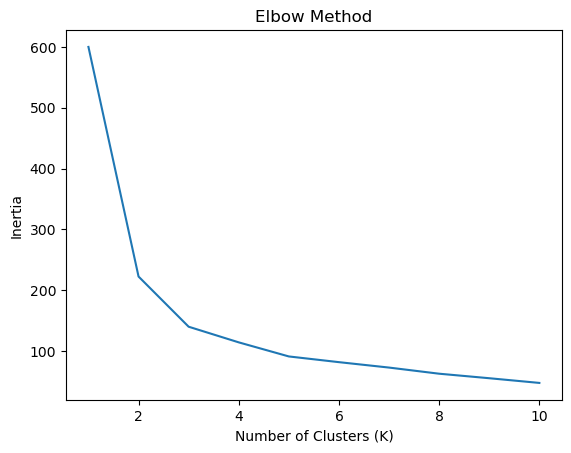

Silhouette Score: 0.45994823920518635


C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


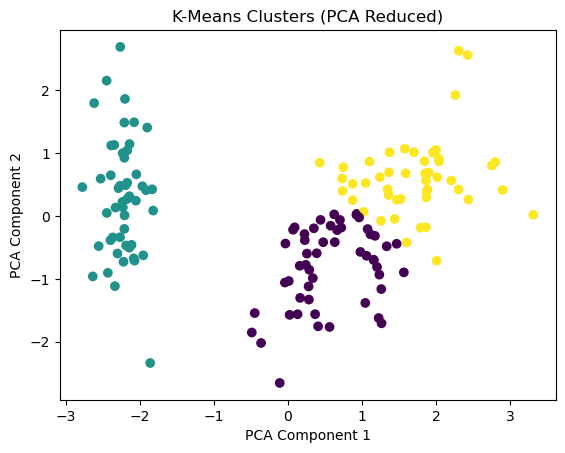

In [2]:
# ==============================
# K-Means Clustering (Stable Version for Windows + Anaconda)
# ==============================

# ---- FIX WINDOWS WARNINGS ----
import os
os.environ["OMP_NUM_THREADS"] = "1"      # Prevent MKL memory leak warning
os.environ["LOKY_MAX_CPU_COUNT"] = "4"   # Set to your logical cores (change if needed)

# ---- IMPORT LIBRARIES ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ---- 1. LOAD DATASET ----
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)

# ---- 2. SCALE FEATURES ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- 3. ELBOW METHOD ----
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure()
plt.plot(K_range, inertia_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# ---- 4. FIT FINAL MODEL (K=3 for Iris) ----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

# ---- 5. SILHOUETTE SCORE ----
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

# ---- 6. PCA FOR VISUALIZATION ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot Clusters
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters (PCA Reduced)")
plt.show()